In [9]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
import os
from glob import glob

In [15]:
data_paths = glob('../dataset/mnist_png/training/*/*.png')
data_paths[0]

'../dataset/mnist_png/training\\0\\1.png'

In [16]:
# 위랑 같은 원리
data_paths = tf.io.matching_files('../dataset/mnist_png/training/*/*.png')

In [17]:
path = data_paths[0]
path

<tf.Tensor: shape=(), dtype=string, numpy=b'..\\dataset\\mnist_png\\training\\0\\1.png'>

## Load Image

In [18]:
# tensorflow 에서 비슷하게 쓰는 기능
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [19]:
image.shape

TensorShape([28, 28, 1])

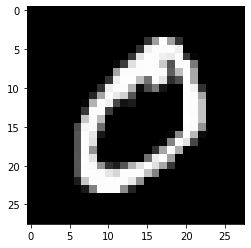

In [20]:
plt.imshow(image[:,:,0],'gray')
plt.show()

## Set Data Generator

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
inputs = image[tf.newaxis, ...]

In [23]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
# 이미지를 변화시키면서 데이터를 넣어준다.

In [30]:
result = next(iter(datagen.flow(inputs)))

print(np.min(result), np.max(result), np.mean(result))

0.0 253.40909 39.657433


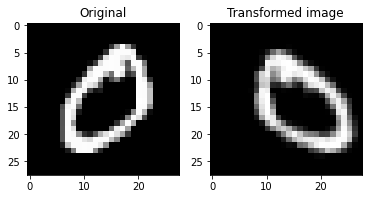

In [31]:
plt.subplot(121)
plt.title('Original')
plt.imshow(np.squeeze(inputs),'gray')

plt.subplot(122)
plt.title('Transformed image')
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Transformation

- width_shift_range : 좌우로 변경
- height_shift_range : 위 아래로 변경
  
- brightness_range  
- zoom_range  : 위아래좌우로 늘리기도하고 줄이기도 한다.
  
- horizontal_flip  
- vertical_flip  
  
- rescale  (Nomalization 중요)
  
- preprocessing_function : 원하는 함수를 넣으면 된다. (람다 함수 같은 것들)

argumentation은 train 모드에서만 진행한다. test모드에서는 그럴 필요 없다.
rescale은 둘다 해줘야 한다.

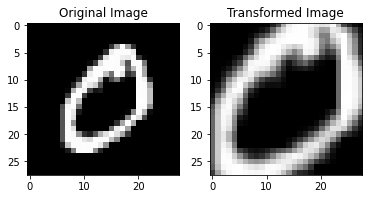

In [32]:
datagen = ImageDataGenerator( # Shift + Tap 으로 함수 내용 확인
    zoom_range=0.7
)

result = next(iter(datagen.flow(inputs)))

plt.subplot(121)
plt.title("Original Image")
plt.imshow(inputs[0, :, :, 0], 'gray')
plt.subplot(122)
plt.title("Transformed Image")
plt.imshow(result[0, :, :, 0], 'gray')
plt.show()

## Rescale시 주의사항

In [33]:
train_datagen = ImageDataGenerator(
    zoom_range=0.7,
    rescale=1./255.
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)